In [1]:
import sys
if ".." not in sys.path:
    sys.path.insert(0, "..")
    
from src.utils import *
from src.plots import *
import torch.optim as optim

In [2]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
embs_audio = torch.load('../embeddings/audio/raw_wav2vec2.pt')
embs_video = torch.load('../embeddings/video/raw2.pt')
fused_embs = concat_embs(embs_audio, embs_video)

In [3]:
train_loader, test_loader = train_test_dataloader(fused_embs)

model = MLP(input_dim = 1536, hidden_dims = [512], output_dim = 6, dropout = 0.2).to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)
num_epochs = 50

PARAMS = {'model': model,
          'criterion': criterion,
          'optimizer': optimizer,
          'num_epochs': num_epochs,
          'train_loader': train_loader,
          'test_loader': test_loader,
          'device': DEVICE,
          'patience': 10}

/home/mweuro/venvy/best_venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
epochs, train_losses, val_losses, train_accs, val_accs, train_precs, val_precs, train_recs, val_recs, best_epoch, cm = train_model(**PARAMS)

Epoch 5/50
Train Loss: 1.0204,                    Train Accuracy: 0.5996,                    Train Precision: 0.5963,                    Train Recall 0.5996.
Val Loss: 0.8722,                    Val Accuracy: 0.6790,                    Val Precision: 0.6833,                    Val Recall: 0.6790.
--------------------------------------------------


Epoch 10/50
Train Loss: 0.8461,                    Train Accuracy: 0.6722,                    Train Precision: 0.6705,                    Train Recall 0.6722.
Val Loss: 0.7691,                    Val Accuracy: 0.7199,                    Val Precision: 0.7235,                    Val Recall: 0.7199.
--------------------------------------------------


Epoch 15/50
Train Loss: 0.7518,                    Train Accuracy: 0.7112,                    Train Precision: 0.7101,                    Train Recall 0.7112.
Val Loss: 0.6775,                    Val Accuracy: 0.7421,                    Val Precision: 0.7547,                    Val Recall: 0.7421.
--------------------------------------------------


Epoch 20/50
Train Loss: 0.6997,                    Train Accuracy: 0.7307,                    Train Precision: 0.7309,                    Train Recall 0.7307.
Val Loss: 0.6248,                    Val Accuracy: 0.7670,                    Val Precision: 0.7790,                    Val Recall: 0.7670.
--------------------------------------------------


Epoch 25/50
Train Loss: 0.6692,                    Train Accuracy: 0.7440,                    Train Precision: 0.7454,                    Train Recall 0.7440.
Val Loss: 0.6195,                    Val Accuracy: 0.7717,                    Val Precision: 0.7747,                    Val Recall: 0.7717.
--------------------------------------------------


Epoch 30/50
Train Loss: 0.6711,                    Train Accuracy: 0.7391,                    Train Precision: 0.7411,                    Train Recall 0.7391.
Val Loss: 0.6737,                    Val Accuracy: 0.7320,                    Val Precision: 0.7469,                    Val Recall: 0.7320.
--------------------------------------------------


Epoch 35/50
Train Loss: 0.6329,                    Train Accuracy: 0.7591,                    Train Precision: 0.7622,                    Train Recall 0.7591.
Val Loss: 0.6056,                    Val Accuracy: 0.7743,                    Val Precision: 0.7844,                    Val Recall: 0.7743.
--------------------------------------------------


Epoch 40/50
Train Loss: 0.6124,                    Train Accuracy: 0.7747,                    Train Precision: 0.7771,                    Train Recall 0.7747.
Val Loss: 0.5781,                    Val Accuracy: 0.7925,                    Val Precision: 0.8087,                    Val Recall: 0.7925.
--------------------------------------------------


Epoch 45/50
Train Loss: 0.5843,                    Train Accuracy: 0.7772,                    Train Precision: 0.7805,                    Train Recall 0.7772.
Val Loss: 0.5427,                    Val Accuracy: 0.8073,                    Val Precision: 0.8134,                    Val Recall: 0.8073.
--------------------------------------------------


Epoch 50/50
Train Loss: 0.5560,                    Train Accuracy: 0.7868,                    Train Precision: 0.7893,                    Train Recall 0.7868.
Val Loss: 0.7264,                    Val Accuracy: 0.7152,                    Val Precision: 0.7912,                    Val Recall: 0.7152.
--------------------------------------------------
BEST EPOCH: 44.00          BEST ACCURACY: 0.81          BEST PRECISION: 0.81          BEST RECALL: 0.81


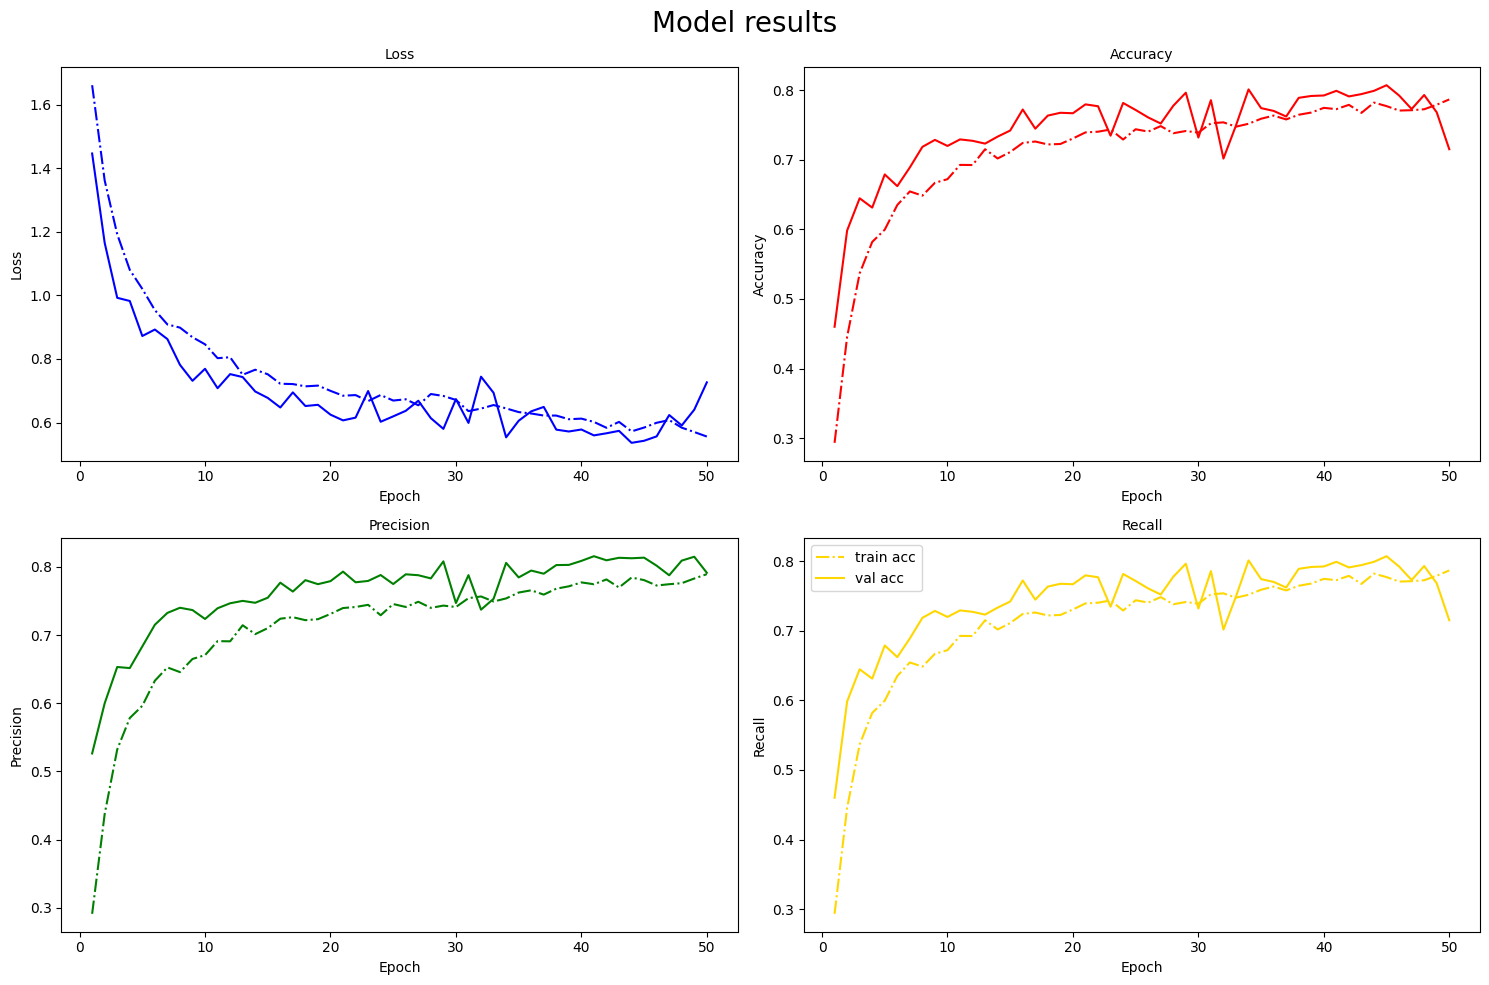

In [5]:
plot_metrics(train_losses, val_losses, train_accs, val_accs, train_precs, val_precs, train_recs, val_recs)

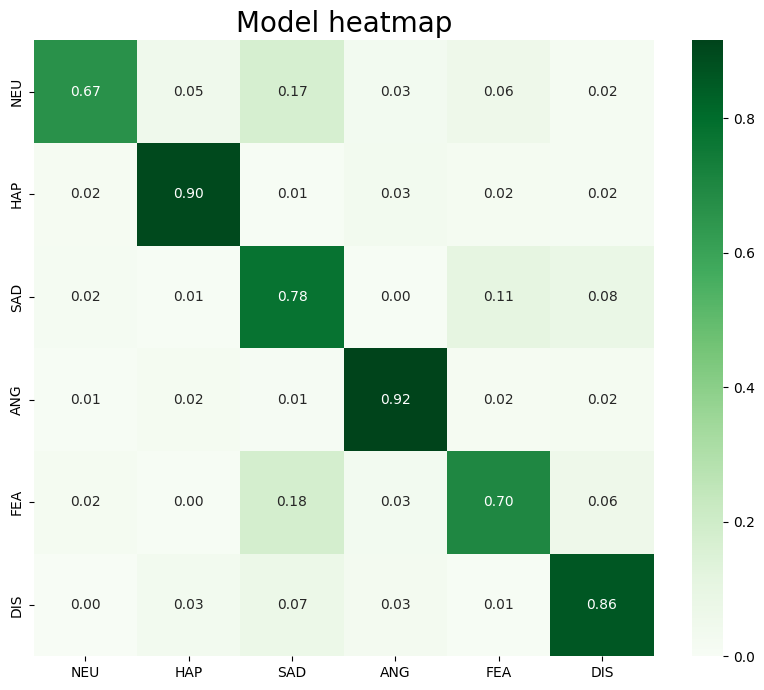

In [6]:
plot_confusion_matrix(cm)